# Importowanie bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

## Pobranie danych

In [2]:
path = "statistics\\GOLDFISH_BLUESSI_VS_LEARNED_REDALDO_FASTEST_SMALL"
dirs = [os.path.join(path, dir) for dir in os.listdir(path)]
mem_files = []
a_loss_files = []
c_loss_files = []
for dir in dirs:
    for file in os.listdir(dir):
        if file.endswith("experiences.csv"):
            mem_files.append(os.path.join(dir, file))
        elif file.endswith("actorLoss.csv"):
            a_loss_files.append(os.path.join(dir, file))
        elif file.endswith("criticLoss.csv"):
            c_loss_files.append(os.path.join(dir, file))
experiences = pd.concat((pd.read_csv(f) for f in mem_files), ignore_index = True)
actorLosses = pd.concat((pd.read_csv(f) for f in a_loss_files), ignore_index = True)
criticLosses = pd.concat((pd.read_csv(f) for f in c_loss_files), ignore_index = True)

# experiences = experiences[-500_000:]
# experiences = experiences.reset_index()
experiences.sort_values("ts")
actorLosses.sort_values("ts")
criticLosses.sort_values("ts")

experiences["win"] = experiences.apply(lambda x: x["done"] == True and x["reward"] > 0, axis=1)
experiences["lose"] = experiences.apply(lambda x: x["done"] == True and x["reward"] < 0, axis=1)
experiences["draw"] = experiences.apply(lambda x: x["done"] == True and x["reward"] == 0, axis=1)

beng = len(experiences)
print(len(experiences))
print(len(criticLosses))
print(len(actorLosses))


440689
19795
19795


# Wykresy

44068.9


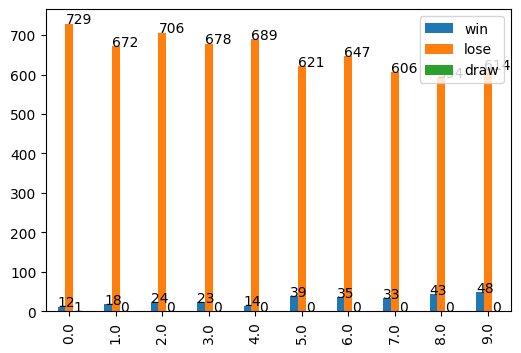

In [3]:
groups = 10
groupSize = experiences.shape[0] / groups
print(groupSize)
groupedMemories = experiences.groupby(experiences.index // groupSize).sum()
mems = groupedMemories[["win", "lose", "draw"]].plot.bar()
for p in mems.patches:
    mems.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.05))

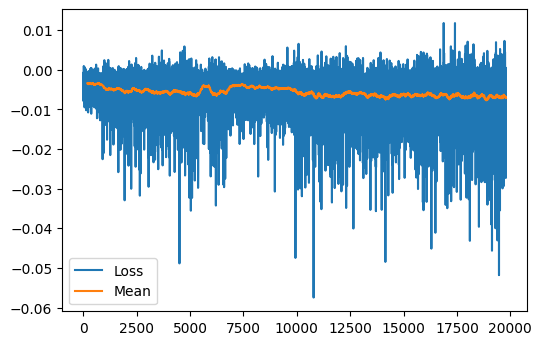

In [4]:
data = actorLosses["loss"]

al = data.plot(y="loss")
mean_al = data.rolling(window=len(data)//100).mean().plot(y="loss", ax=al)
mean_al.legend(["Loss", "Mean"])


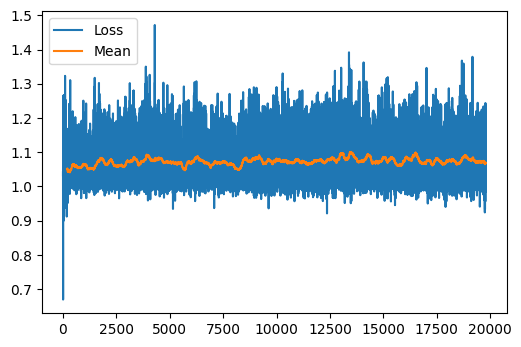

In [5]:
data = criticLosses["loss"]

al = data.plot(y="loss")
mean_al = data.rolling(window=len(data)//100).mean().plot(y="loss", ax=al)
mean_al.legend(["Loss", "Mean"])


ballGateTraj   -1.180241
toBallTraj     -0.117121
dtype: float64


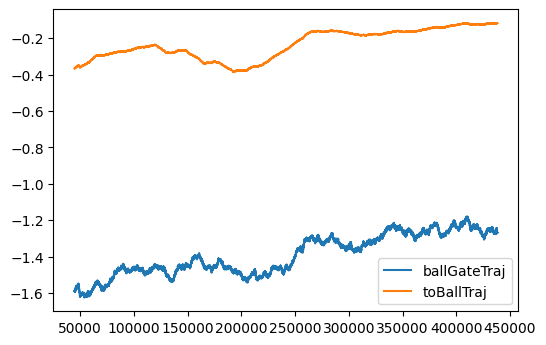

In [6]:
data = experiences[["ballGateTraj", "toBallTraj"]]
data = data.dropna()
roll = data.rolling(window=int(groupSize)).mean()
roll.plot()
print(roll.max())


0    71.567251
dtype: float64


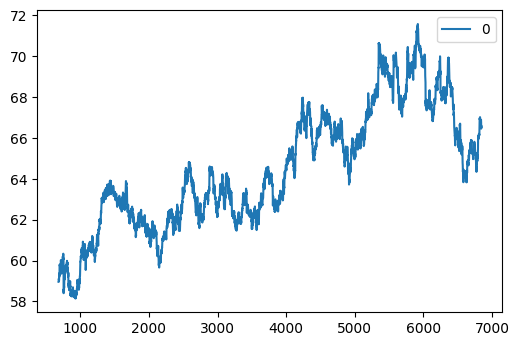

In [7]:
episodeLengths = []
currentEpisodeLength = 1
for row in experiences.itertuples():
    if row.done:
        episodeLengths.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengths.append(currentEpisodeLength)

episodeLengths = pd.DataFrame(episodeLengths)
roll = episodeLengths.rolling(window=len(episodeLengths)//10).mean()
roll.plot()
print(roll.max())

# Wykresy 2

In [8]:
path = "statistics\\BLUESSI_VS_LEARNED_REDALDO_FASTEST_SMALL"
dirs = [os.path.join(path, dir) for dir in os.listdir(path)]
mem_files = []
a_loss_files = []
c_loss_files = []
for dir in dirs:
    for file in os.listdir(dir):
        if file.endswith("experiences.csv"):
            mem_files.append(os.path.join(dir, file))

csvs = []
count = 0
for f in mem_files:
    csv = pd.read_csv(f)
    csvs.append(csv)
    count += len(csv)
    if count >= beng:
        break
    
experiences = pd.concat(csvs, ignore_index = True)
experiences.sort_values("ts")

experiences = experiences[:beng]

experiences["win"] = experiences.apply(lambda x: x["done"] == True and x["reward"] > 0, axis=1)
experiences["lose"] = experiences.apply(lambda x: x["done"] == True and x["reward"] < 0, axis=1)
experiences["draw"] = experiences.apply(lambda x: x["done"] == True and x["reward"] == 0, axis=1)

print(len(experiences))

440689


44068.9


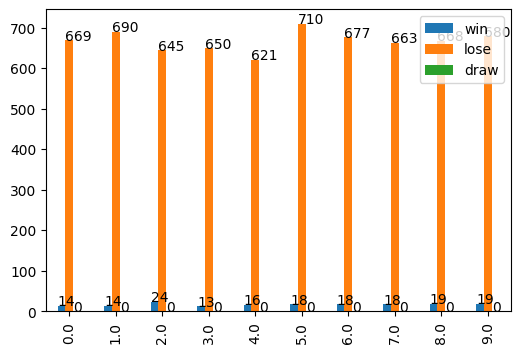

In [9]:
groups = 10
groupSize = experiences.shape[0] / groups
print(groupSize)
groupedMemories = experiences.groupby(experiences.index // groupSize).sum()
mems = groupedMemories[["win", "lose", "draw"]].plot.bar()
for p in mems.patches:
    mems.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.05))

ballGateTraj   -1.318595
toBallTraj     -0.283908
dtype: float64


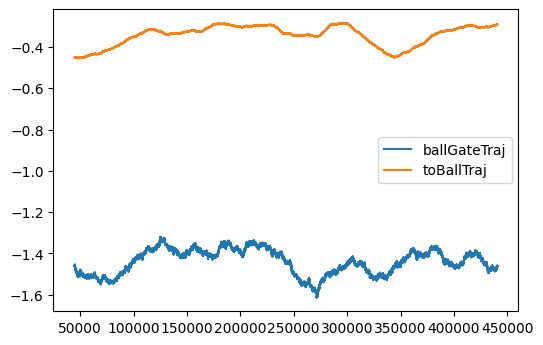

In [10]:
data = experiences[["ballGateTraj", "toBallTraj"]]
data = data.dropna()
roll = data.rolling(window=int(groupSize)).mean()
roll.plot()
print(roll.max())

# ballGateTraj   -1.287824
# toBallTraj     -0.157784

# ballGateTraj   -1.286469
# toBallTraj     -0.153777

# ballGateTraj   -1.238284
# toBallTraj     -0.118836

0    69.893275
dtype: float64


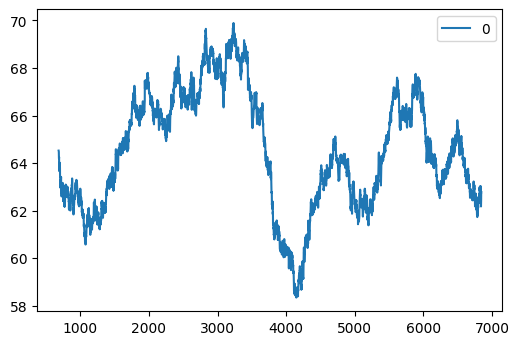

In [11]:
episodeLengths = []
currentEpisodeLength = 1
for row in experiences.itertuples():
    if row.done:
        episodeLengths.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengths.append(currentEpisodeLength)

episodeLengths = pd.DataFrame(episodeLengths)
roll = episodeLengths.rolling(window=len(episodeLengths)//10).mean()
roll.plot()
print(roll.max())

# 67.125503